#  Data Prep for EDA-Boot

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import reuse_function as reuse


In [2]:
import importlib
importlib.reload(reuse)

<module 'reuse_function' from 'C:\\Users\\agupt38\\Documents\\ML\\ALLModelBuilding\\MLBoot\\reuse_function.py'>

In [3]:
# change value of target_col according to your scenario
target_col = 'Status'

### Load the data into a dataframe and have a look at  the dataset information


In [11]:
df = pd.read_pickle(r"C:\Users\agupt38\Documents\ML\IDWs ML\ExploratoryDataAnalysis\data_2019\AllUnet_plus_Universal_dup_2019.pkl")
# df1 = pd.read_pickle(r"C:\Users\agupt84\Desktop\ML\PRJs\IDW\git\dfUnetUnivOutput1.pkl")

### To get acquainted with our data, let’s look at the first 5 entries using `head()`:

In [13]:
# Keeping only DUP algo records
df = df[df.coreextractid.str.contains('DUP',regex=False)]

In [14]:
df.shape

(906983, 129)

In [10]:
list(df.columns)

['coreextractid',
 'Algorithmbatchrowid',
 'claimgroup',
 'CLM_AUD_NBR',
 'BASE_AUDIT_10',
 'DTL_NBR',
 'FSTSRVDT',
 'LSTSRVDT',
 'FROM_YMD',
 'CLAIMPOS',
 'SRVCCNT',
 'SYSDRG',
 'BIL_DRG_CD',
 'RVNU_CD',
 'PROC_CD',
 'PROC_MOD',
 'PROC_MOD_2',
 'PROC_MOD_3',
 'PROC_MOD_4',
 'PROC_MOD_5',
 'DIAG1',
 'DIAG2',
 'DIAG3',
 'DIAG_4_CD',
 'DIAG_5_CD',
 'PROC1',
 'PROC2',
 'PROC3',
 'BIL_PROC_CD_CS',
 'AMT_CLAI',
 'AMT_DEDU',
 'COINSAMT',
 'COPAY',
 'AMT_DISA',
 'AMT_DISC',
 'AMT_MAX',
 'AMT_PAID',
 'COBSVAMT',
 'COB_RDUC_AMT',
 'RCNSD_RDUC_AMT',
 'AMT_NON_DUP',
 'PAIDDATE',
 'ORIGPDDT',
 'SRVRSNCD',
 'CLMRSNCD',
 'OVRIDECD',
 'RECV_YMD',
 'CHK_NBR',
 'CHK_ISS_DT',
 'PARSNBR',
 'CLM_LOC',
 'PROVTIN',
 'PROVSPCL',
 'NTWKPARI',
 'PROVNAME',
 'PROV_SVC_ST',
 'ADRTYPCD',
 'PRBILST',
 'PROV_CAT',
 'PRODUCT',
 'ISS_ST_ABBR_CD',
 'MBRMKT',
 'REL_CD',
 'MKT_SEG',
 'MCVEFFDT',
 'MCVENDDT',
 'FINC_CD',
 'CAPFLG',
 'CPTATN_FUND_CD',
 'SHR_ARNG_CD',
 'OBLIG_CD',
 'CO_CD',
 'COBIND',
 'COB_MEDCR_PROC_TYP_

In [8]:
df.head()

coreextractid  Algorithmbatchrowid  claimgroup   CLM_AUD_NBR BASE_AUDIT_10  \
0  DUPFACMBBLUA              1074941           1  575596504401    5755965044   
1  DUPFACMBBLUA              1074941           1  575596504401    5755965044   
2  DUPFACMBBLUA              1074941           2  577162745601    5771627456   
3  DUPFACMBBLUA              1074941           2  577162745601    5771627456   
4  DUPFACMBBLUA              1074941           3  580644267801    5806442678   

  DTL_NBR   FSTSRVDT   LSTSRVDT   FROM_YMD CLAIMPOS  SRVCCNT SYSDRG  \
0       1 2015-12-10 2015-12-10 2015-12-10       22        1   None   
1       1 2015-12-10 2015-12-10 2015-12-10       22        1   None   
2       1 2015-12-21 2015-12-21 2015-12-21       22        5   None   
3       1 2015-12-21 2015-12-21 2015-12-21       22        5   None   
4       1 2016-01-06 2016-01-06 2016-01-06       22        1   None   

  BIL_DRG_CD RVNU_CD PROC_CD PROC_MOD PROC_MOD_2 PROC_MOD_3 PROC_MOD_4  \
0      -----    0240    None     None       None       None       None   
1      -----    0240    None     None       None       None       None   
2       None    0300   89240     None       None       None       None   
3       None    0300   89240     None       None       None       None   
4       None    0490   11302     None       None       None       None   

  PROC_MOD_5   DIAG1   DIAG2   DIAG3 DIAG_4_CD DIAG_5_CD    PROC1    PROC2  \
0       None  Z85828  Z85830  Z85820      Z859      E785  0000000  0000000   
1       None  Z85828  Z85830  Z85820      Z859      E785  0000000  0000000   
2       None  Z85828  Z85830  Z85820      Z859    Z85828  0000000  0000000   
3       None  Z85828  Z85830  Z85820      Z859    Z85828  0000000  0000000   
4       None    D225     I10   F4323      B159    Z85820  0000000  0000000   

     PROC3 BIL_PROC_CD_CS  AMT_CLAI  AMT_DEDU  COINSAMT  COPAY  AMT_DISA  \
0  0000000          99211       0.0       0.0       0.0    0.0      0.00   
1  0000000          99211     248.0       0.0       0.0    0.0     54.56   
2  0000000          36415       0.0       0.0       0.0    0.0      0.00   
3  0000000          36415     834.0       0.0       0.0    0.0    183.48   
4  0000000          88305       0.0       0.0       0.0    0.0      0.00   

   AMT_DISC  AMT_MAX  AMT_PAID  COBSVAMT  COB_RDUC_AMT  RCNSD_RDUC_AMT  \
0       0.0     0.00      0.00       0.0           0.0             0.0   
1       0.0   193.44    193.44       0.0           0.0             0.0   
2       0.0     0.00      0.00       0.0           0.0             0.0   
3       0.0   650.52    650.52       0.0           0.0             0.0   
4       0.0     0.00      0.00       0.0           0.0             0.0   

   AMT_NON_DUP   PAIDDATE   ORIGPDDT SRVRSNCD CLMRSNCD OVRIDECD   RECV_YMD  \
0          0.0 2016-01-07 2016-01-07       YP     None       13 2015-12-24   
1        248.0 2016-01-07 2016-01-07       YP     None       13 2015-12-24   
2          0.0 2016-01-07 2016-01-07       YP     None       10 2016-01-06   
3        834.0 2016-01-07 2016-01-07       YP     None       10 2016-01-06   
4          0.0 2016-02-05 2016-02-05       YP     None       13 2016-01-28   

       CHK_NBR CHK_ISS_DT PARSNBR CLM_LOC    PROVTIN PROVSPCL NTWKPARI  \
0  QG 23557789 2016-01-13    None       1  131624082     None     None   
1  QG 23557789 2016-01-13    None       1  131624082     None     None   
2  QG 23557789 2016-01-13    None       1  131624082     None     None   
3  QG 23557789 2016-01-13    None       1  131624082     None     None   
4  QG 23618814 2016-02-10    None       1  131624082     None     None   

                      PROVNAME PROV_SVC_ST ADRTYPCD PRBILST PROV_CAT PRODUCT  \
0  URN MEMORIAL HSP FOR CANCER          NY      SRV      NY     0001     PS1   
1  URN MEMORIAL HSP FOR CANCER          NY      SRV      NY     0001     PS1   
2  URN MEMORIAL HSP FOR CANCER          NY      SRV      NY     0001     PS1   
3  URN MEMORIAL HSP FOR CANCER          NY  

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512136 entries, 0 to 2096825
Data columns (total 128 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   coreextractid            object        
 1   Algorithmbatchrowid      int64         
 2   claimgroup               int64         
 3   CLM_AUD_NBR              object        
 4   BASE_AUDIT_10            object        
 5   DTL_NBR                  object        
 6   FSTSRVDT                 datetime64[ns]
 7   LSTSRVDT                 datetime64[ns]
 8   FROM_YMD                 datetime64[ns]
 9   CLAIMPOS                 object        
 10  SRVCCNT                  int64         
 11  SYSDRG                   object        
 12  BIL_DRG_CD               object        
 13  RVNU_CD                  object        
 14  PROC_CD                  object        
 15  PROC_MOD                 object        
 16  PROC_MOD_2               object        
 17  PROC_MOD_3               ob

In [20]:
df.shape

(512136, 128)

### Now lets Visualize how the Target Column  is distributed i.e. target_col

Approved Reject     478376
Loaded To ODAR       33703
Auditor Exported        57
Name: Status, dtype: int64


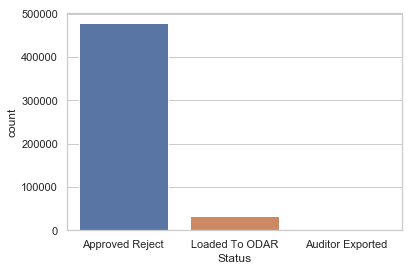

In [21]:
print(df[target_col].value_counts())
ax = sns.countplot(df[target_col],label="Count")

### Model Columns:

> ['coreextractid','CLAIMPOS','DIAG1','BIL_PROC_CD_CS','diffPaidDtLstSrv'
                    ,'ADJ_NBR','PROV_CAT','PROC_CD','DIAG2','PROVNAME','EmpId','PROVTIN'
                    ,'INDV_ID','OVRIDECD','PolNbr','diffFstSrvCovEnd','AMT_CLAI'
                    ,'CONTR_MKT_NBR','DIAG3','CLM_LOC','RVNU_CD','MBRMKT','RECV_YMD_D'
                    ,'PAIDDATE_D','SRVRSNCD','DIAG_4_CD','AMT_PAID','SUBGRP_1_CD','LSTSRVDT_D'
                    ,'FROM_YMD_D','FACL_CONTR_METH_CD','PRBILST','FSTSRVDT_D','AMT_DISC'
                    ,'SITUS_ST_ABBR_CD']


#### Removed below as not in index:
> "['PAIDDATE_D', 'PolNbr', 'FSTSRVDT_D', 'EmpId', 'FROM_YMD_D', 'diffFstSrvCovEnd', 'LSTSRVDT_D', 'diffPaidDtLstSrv', 'RECV_YMD_D'] not in index"

In [15]:
df_model = df[['coreextractid','CLAIMPOS','DIAG1','BIL_PROC_CD_CS','ADJ_NBR','PROV_CAT','PROC_CD','DIAG2','PROVNAME','PROVTIN'
                    ,'INDV_ID','OVRIDECD','AMT_CLAI'
                    ,'CONTR_MKT_NBR','DIAG3','CLM_LOC','RVNU_CD','MBRMKT'
                    ,'SRVRSNCD','DIAG_4_CD','AMT_PAID','SUBGRP_1_CD'
                    ,'FACL_CONTR_METH_CD','PRBILST','AMT_DISC'
                    ,'SITUS_ST_ABBR_CD'
              ,'PAIDDATE','FSTSRVDT','FROM_YMD','FSTSRVDT','LSTSRVDT','RECV_YMD'
                ,'AMT_NON_DUP','AMT_MAX','COPAY','CopayAmount','Status'
              ]]

In [16]:
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906983 entries, 0 to 3687477
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   coreextractid       906983 non-null  object        
 1   CLAIMPOS            906983 non-null  object        
 2   DIAG1               906979 non-null  object        
 3   BIL_PROC_CD_CS      771562 non-null  object        
 4   ADJ_NBR             906983 non-null  object        
 5   PROV_CAT            906983 non-null  object        
 6   PROC_CD             583805 non-null  object        
 7   DIAG2               764561 non-null  object        
 8   PROVNAME            906928 non-null  object        
 9   PROVTIN             906983 non-null  object        
 10  INDV_ID             906733 non-null  object        
 11  OVRIDECD            428578 non-null  object        
 12  AMT_CLAI            906983 non-null  float64       
 13  CONTR_MKT_NBR       906983 n

In [17]:
df_model.describe()

AMT_CLAI       AMT_PAID       AMT_DISC    AMT_NON_DUP  \
count  906983.000000  906983.000000  906983.000000  906983.000000   
mean     3065.428585    1088.659637    1354.566534    2990.139918   
std     11484.105965    6301.948734    7993.245372   11328.449740   
min    -99999.990000  -99999.000000  -99999.990000  -99999.990000   
25%        18.000000       0.000000       0.000000       0.000000   
50%       210.000000      20.160000       6.150000     195.000000   
75%      1461.000000     225.900000     274.000000    1350.400000   
max     99999.990000   99999.990000   99999.990000   99999.990000   

             AMT_MAX          COPAY    CopayAmount  
count  906983.000000  906983.000000  906983.000000  
mean     1241.522675       4.582323       4.582323  
std      6824.845359      37.385217      37.385217  
min    -99999.000000   -1200.000000   -1200.000000  
25%         0.000000       0.000000       0.000000  
50%        19.780000       0.000000       0.000000  
75%       262.460000       0.000000       0.000000  
max     99999.990000    5376.000000    5376.000000

                                                                                   
                                                                                   
====== GENERATING STATS FOR coreextractid: ================
====== Total Subcategories FOR  coreextractid Are : 66
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For coreextractid: ================
---------------------------------------
      coreextractid   count  PERCENTAGE
9      DUPFACMBOSUA  190873   37.269983
13     DUPFACMBROSU  119617   23.356491
41      DUPFMSBCOUA   33697    6.579698
10  DUPFACMBOSUA_OS   21194    4.138354
52     DUPLABWOMODU   15262    2.980068
3      DUPFACMBBTUA   11936    2.330631
2       DUPFACMBBTU   10644    2.078354
43      DUPFMSBRCUA   10205    1.992635
22     DUPFACMSBCOU   10199    1.991463
0      DUPFACMBBLUA    9740    1.901839
50     DUPLABWOMO2U    8701    1.698963
64       DUPPHYSN5U    8322    1.624959
65       DUPPHYSN6U    6461   

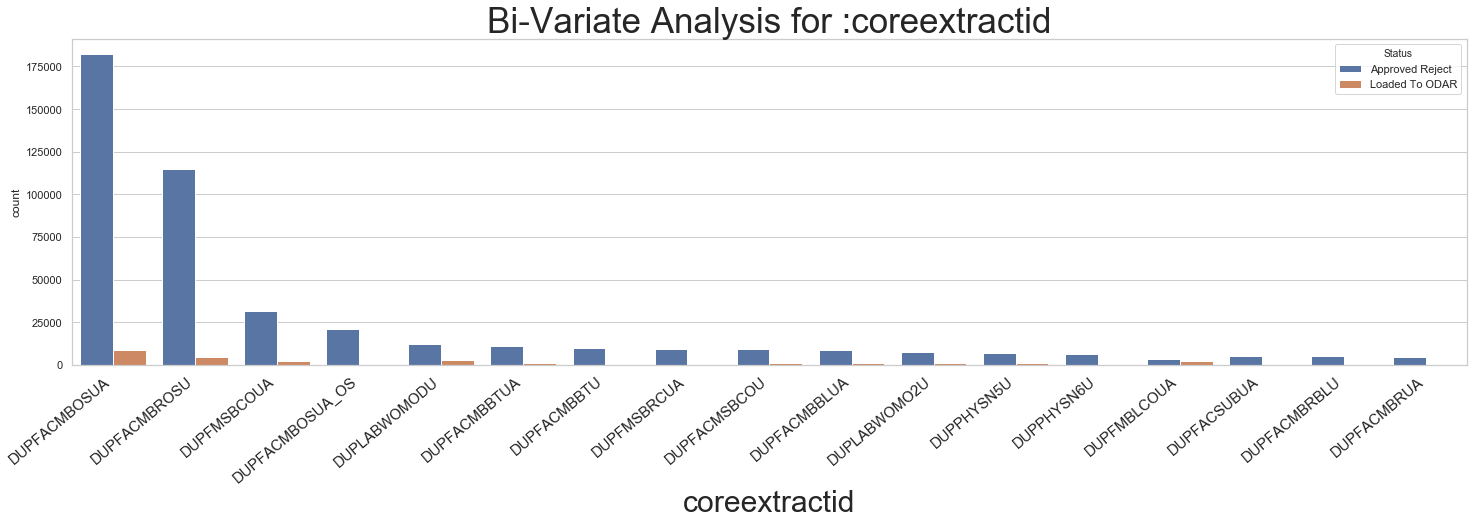

                                                                                   
                                                                                   
====== GENERATING STATS FOR CLAIMPOS: ================
====== Total Subcategories FOR  CLAIMPOS Are : 18
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For CLAIMPOS: ================
---------------------------------------
   CLAIMPOS   count  PERCENTAGE
3        22  357279   69.762524
2        21   57434   11.214599
1        12   27107    5.292930
0        11   24964    4.874486
4        24   15398    3.006623
9        81   11541    2.253503
15       OL    8518    1.663230
crosstab
====== CROSSTAB STATS FOR CLAIMPOS: ================
---------------------------------------
CLAIMPOS             11     12     21      22     24     81    OL     All
Status                                                                   
Approved Reject   19989  26483  56989  332790  13715  11471

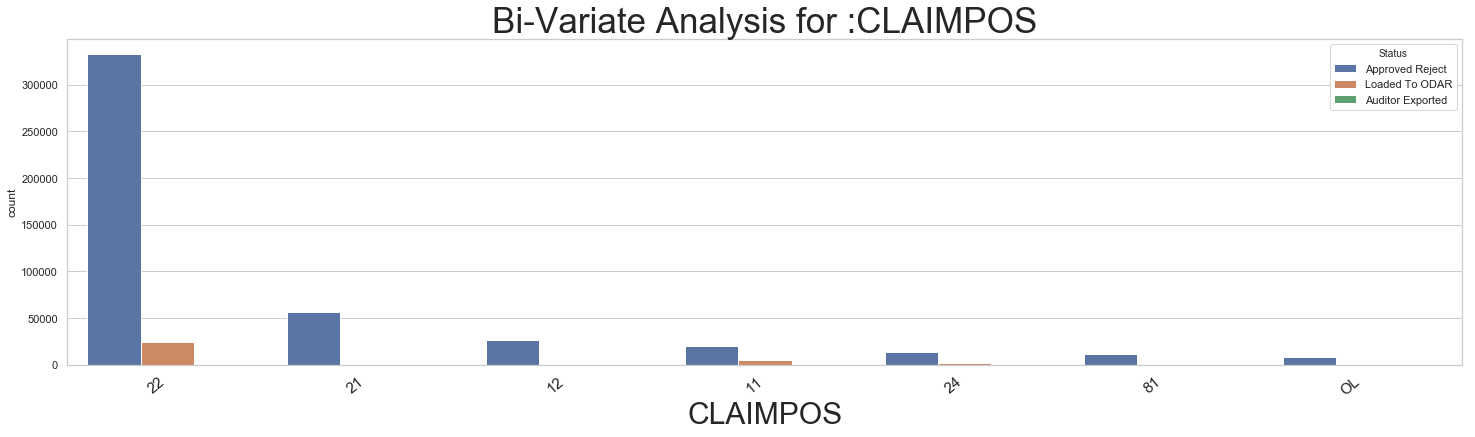

                                                                                   
                                                                                   
====== GENERATING STATS FOR DIAG1: ================
====== Total Subcategories FOR  DIAG1 Are : 9007
---------------------------------------
====== Subcategories FOR More Than  0.5 Percent Data For DIAG1: ================
---------------------------------------
       DIAG1  count  PERCENTAGE
4594    N186  19975    3.900331
8734   Z5111  19691    3.844877
8457   Z0000   5835    1.139346
5780   R0789   5482    1.070419
5781    R079   5471    1.068271
5985     R55   4392    0.857585
8479  Z01818   4194    0.818923
45      A419   3777    0.737499
8700    Z471   3586    0.700205
2285     I10   3214    0.627568
657    C9000   2957    0.577386
5809    R109   2808    0.548292
8522   Z1231   2747    0.536381
1528    F840   2693    0.525837
8735   Z5112   2624    0.512364
crosstab
====== CROSSTAB STATS FOR DIAG1: ================

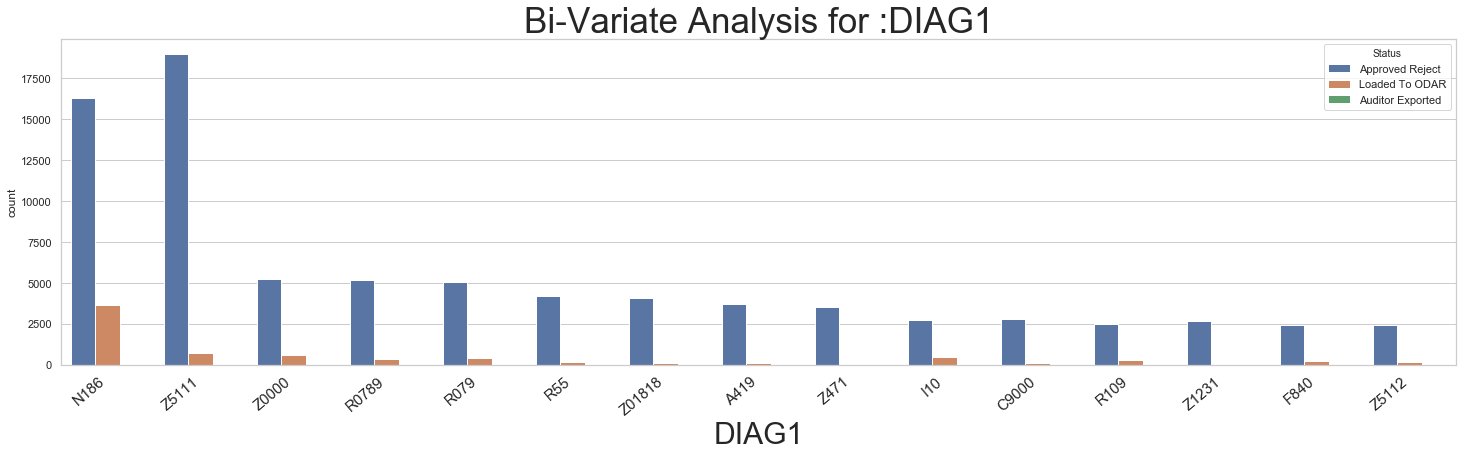

                                                                                   
                                                                                   
====== GENERATING STATS FOR BIL_PROC_CD_CS: ================
====== Total Subcategories FOR  BIL_PROC_CD_CS Are : 5337
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For BIL_PROC_CD_CS: ================
---------------------------------------
     BIL_PROC_CD_CS  count  PERCENTAGE
1200          36415  17666    3.449474
2608          80053  10036    1.959636
3646          93005   9860    1.925270
3944          97110   9376    1.830764
4058          99285   8638    1.686661
4057          99284   8146    1.590593
3541          90999   7008    1.368387
4128          A0425   6565    1.281886
4548          G0378   6141    1.199096
4056          99283   6109    1.192847
3961          97530   5522    1.078229
crosstab
====== CROSSTAB STATS FOR BIL_PROC_CD_CS: ================
---------

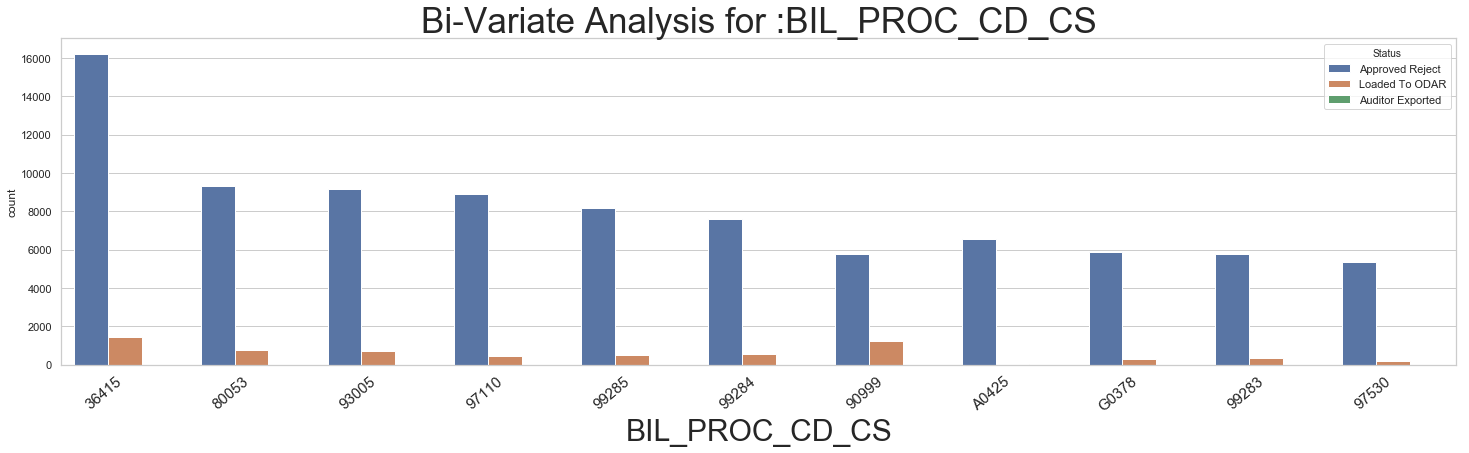

                                                                                   
                                                                                   
====== GENERATING STATS FOR ADJ_NBR: ================
====== Total Subcategories FOR  ADJ_NBR Are : 2979
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For ADJ_NBR: ================
---------------------------------------
       ADJ_NBR   count  PERCENTAGE
31   000008273  214444   41.872471
651  000167290   10382    2.027196
crosstab
====== CROSSTAB STATS FOR ADJ_NBR: ================
---------------------------------------
ADJ_NBR          000008273  000167290     All
Status                                       
Approved Reject     196858       9594  206452
Loaded To ODAR       17586        788   18374
All                 214444      10382  224826
====== CHI2 STATS For ADJ_NBR: ================
---------------------------------------
Below are Chi-2 test results
dof=1
probabi

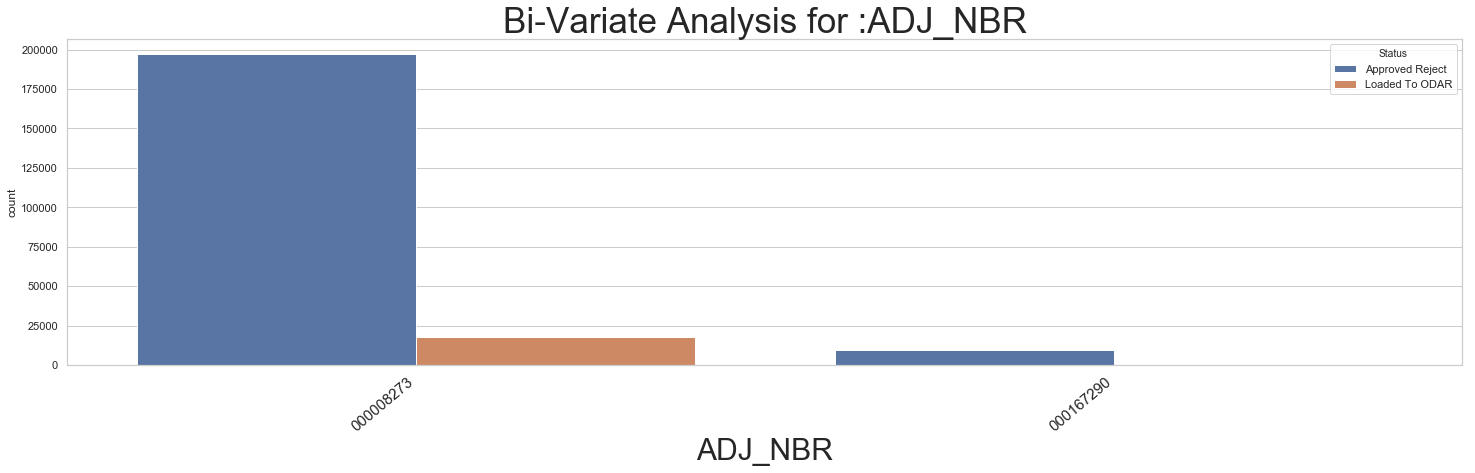

                                                                                   
                                                                                   
====== GENERATING STATS FOR PROV_CAT: ================
====== Total Subcategories FOR  PROV_CAT Are : 280
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PROV_CAT: ================
---------------------------------------
    PROV_CAT   count  PERCENTAGE
1       0001  380178   74.233797
20      0080   25173    4.915296
11      0046   18885    3.687497
13      0054   12029    2.348790
9       0034   11658    2.276348
162     1086    5731    1.119039
crosstab
====== CROSSTAB STATS FOR PROV_CAT: ================
---------------------------------------
PROV_CAT            0001   0034   0046   0054   0080  1086     All
Status                                                            
Approved Reject   359460  10175  15280  11967  24696  5550  427128
Auditor Exported      57      

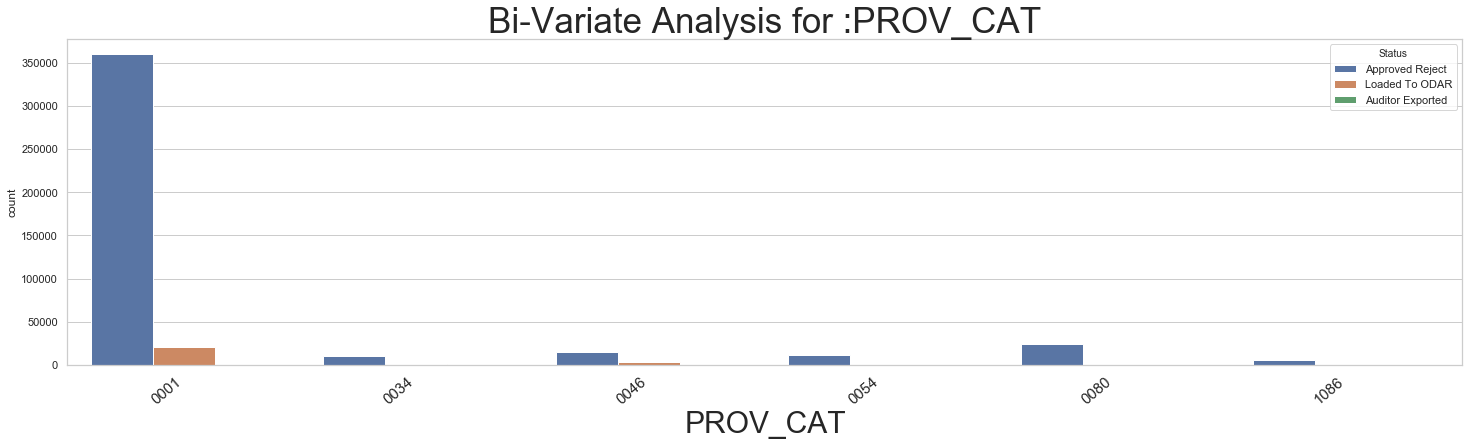

                                                                                   
                                                                                   
====== GENERATING STATS FOR PROC_CD: ================
====== Total Subcategories FOR  PROC_CD Are : 3708
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PROC_CD: ================
---------------------------------------
     PROC_CD  count  PERCENTAGE
2801   89240  57113   11.151921
3364   G0154  25128    4.906509
2132   76499  24584    4.800287
3098   97100  20602    4.022760
2859   91000  11581    2.261313
3220   A0428  11458    2.237296
2858   90935   7359    1.436923
2891   92507   6701    1.308442
crosstab
====== CROSSTAB STATS FOR PROC_CD: ================
---------------------------------------
PROC_CD           76499  89240  90935  91000  92507  97100  A0428  G0154  \
Status                                                                     
Approved Reject   22574  

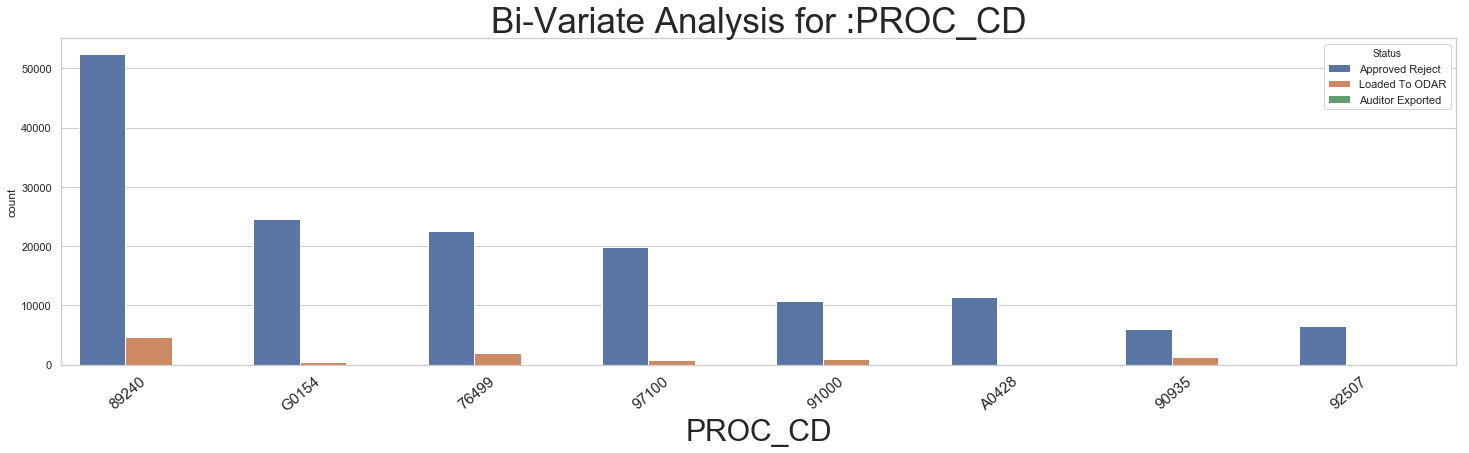

                                                                                   
                                                                                   
====== GENERATING STATS FOR DIAG2: ================
====== Total Subcategories FOR  DIAG2 Are : 8475
---------------------------------------
====== Subcategories FOR More Than  0.5 Percent Data For DIAG2: ================
---------------------------------------
       DIAG2  count  PERCENTAGE
2165     I10  12889    2.516714
4407   N2581   8447    1.649367
851     D509   4586    0.895465
1054    E119   3789    0.739843
8471    Z992   3619    0.706648
8225  Z79899   3296    0.643579
7913     Z23   2744    0.535795
1151    E785   2725    0.532085
5542    R109   2698    0.526813
7974    Z370   2675    0.522322
5712  R45851   2668    0.520955
5511    R079   2653    0.518026
5548    R112   2601    0.507873
crosstab
====== CROSSTAB STATS FOR DIAG2: ================
---------------------------------------
DIAG2             D509 

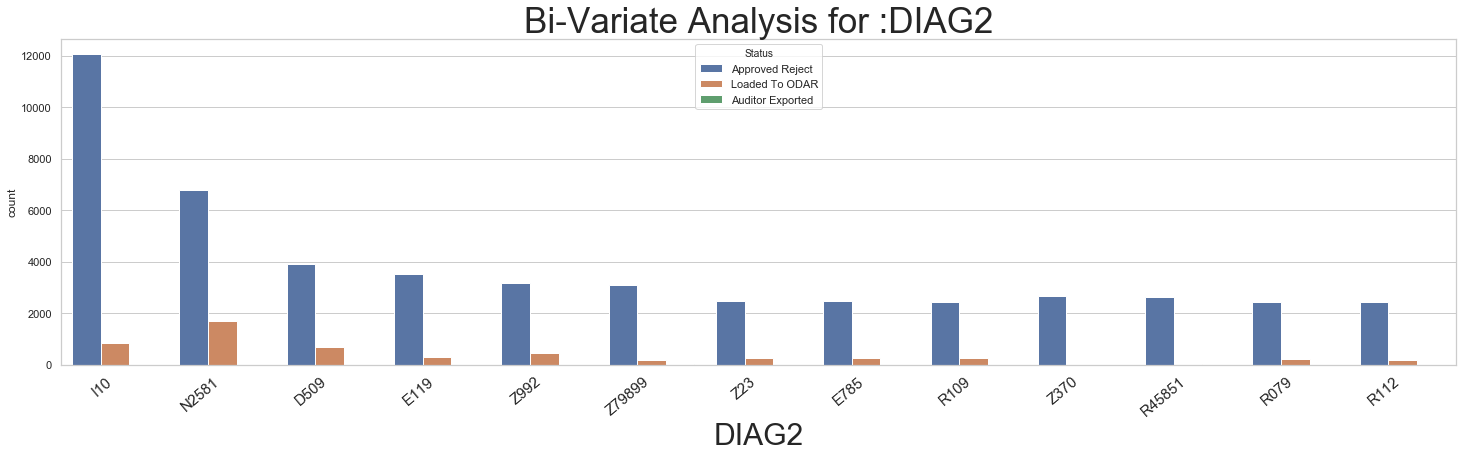

                                                                                   
                                                                                   
====== GENERATING STATS FOR PROVNAME: ================
====== Total Subcategories FOR  PROVNAME Are : 10692
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PROVNAME: ================
---------------------------------------
                         PROVNAME  count  PERCENTAGE
6875  NYU LANGONE HOSPITALS TISCH   5469     1.06788
crosstab
====== CROSSTAB STATS FOR PROVNAME: ================
---------------------------------------
PROVNAME         NYU LANGONE HOSPITALS TISCH   All
Status                                            
Approved Reject                         5224  5224
Loaded To ODAR                           245   245
All                                     5469  5469
====== CHI2 STATS For PROVNAME: ================
---------------------------------------
Below are 

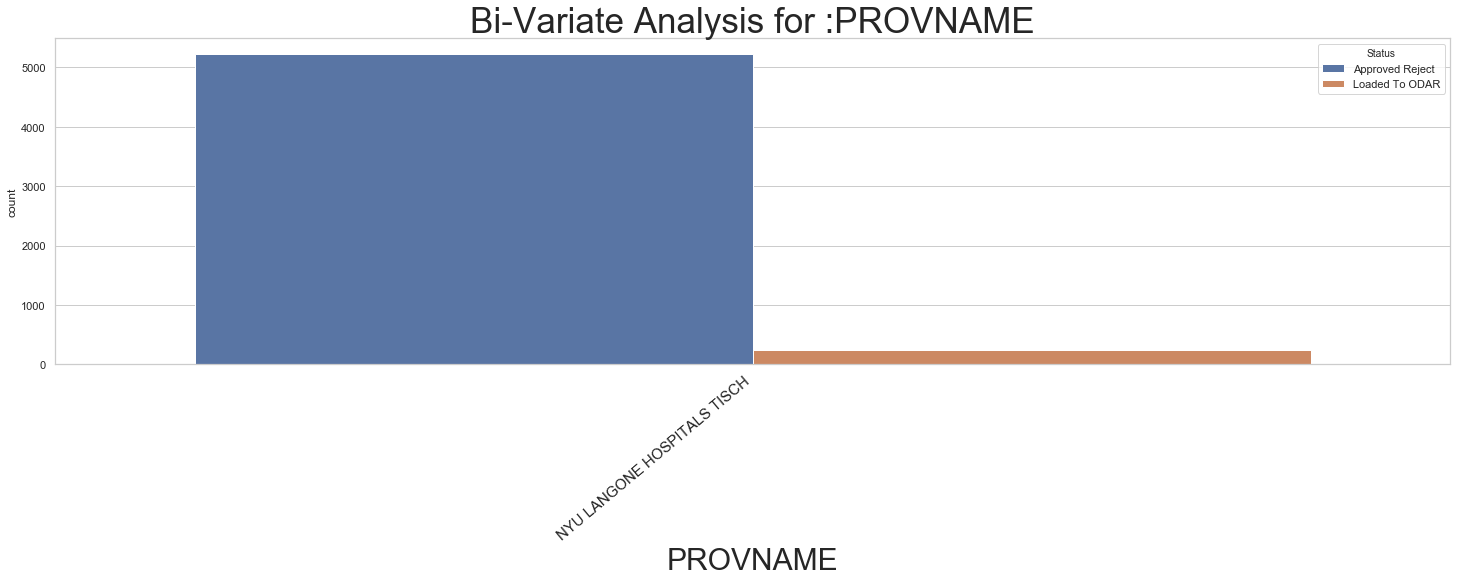

                                                                                   
                                                                                   
====== GENERATING STATS FOR PROVTIN: ================
====== Total Subcategories FOR  PROVTIN Are : 7819
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PROVTIN: ================
---------------------------------------
       PROVTIN  count  PERCENTAGE
476  133971298   7269    1.419350
474  133957095   5246    1.024337
crosstab
====== CROSSTAB STATS FOR PROVTIN: ================
---------------------------------------
PROVTIN          133957095  133971298    All
Status                                      
Approved Reject       5030       6996  12026
Loaded To ODAR         216        273    489
All                   5246       7269  12515
====== CHI2 STATS For PROVTIN: ================
---------------------------------------
Below are Chi-2 test results
dof=1
probability=0.9

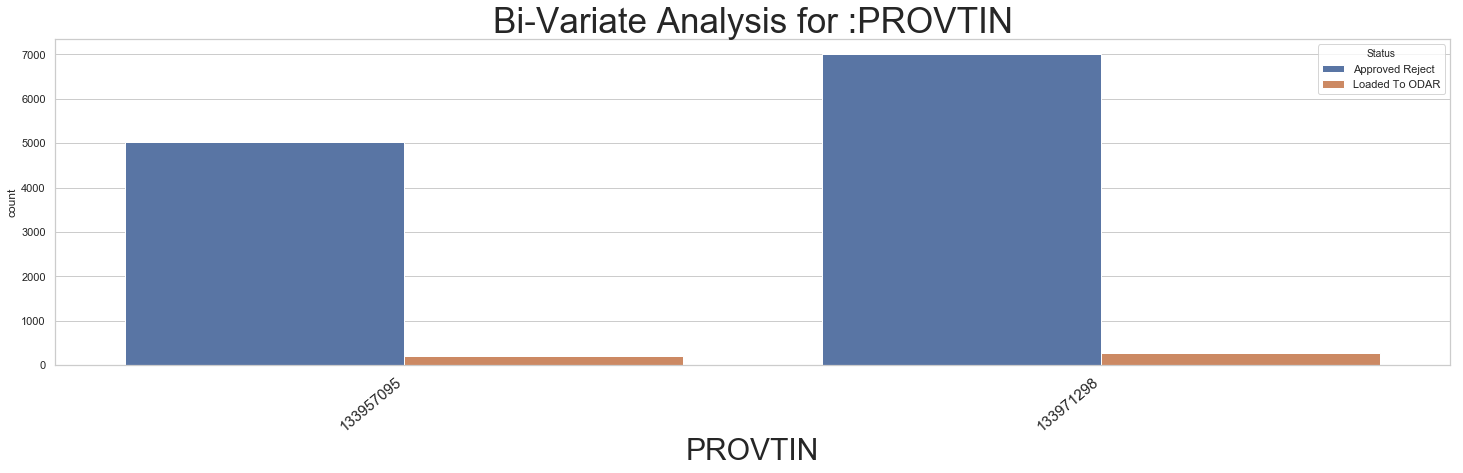

                                                                                   
                                                                                   
====== GENERATING STATS FOR INDV_ID: ================
====== Total Subcategories FOR  INDV_ID Are : 60579
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For INDV_ID: ================
---------------------------------------
Empty DataFrame
Columns: [INDV_ID, count, PERCENTAGE]
Index: []
crosstab
====== CROSSTAB STATS FOR INDV_ID: ================
---------------------------------------
No crosstab as df_gt_1_percent is empty
====== CHI2 STATS For INDV_ID: ================
---------------------------------------
No crosstab as df_gt_1_percent is empty
                                                                                   
                                                                                   
====== GENERATING STATS FOR OVRIDECD: ================
====== To

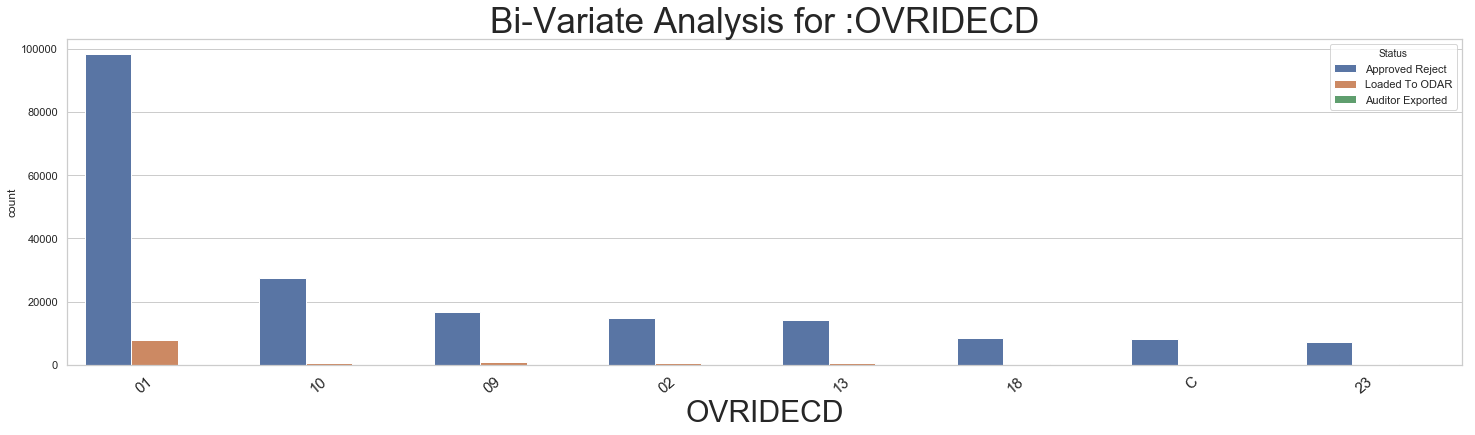

                                                                                   
                                                                                   
====== GENERATING STATS FOR AMT_CLAI: ================
====== Total Subcategories FOR  AMT_CLAI Are : 105935
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For AMT_CLAI: ================
---------------------------------------
      AMT_CLAI   count  PERCENTAGE
4689       0.0  126182   24.638377
crosstab
====== CROSSTAB STATS FOR AMT_CLAI: ================
---------------------------------------
AMT_CLAI             0.0     All
Status                          
Approved Reject   118410  118410
Auditor Exported       2       2
Loaded To ODAR      7770    7770
All               126182  126182
====== CHI2 STATS For AMT_CLAI: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fail 

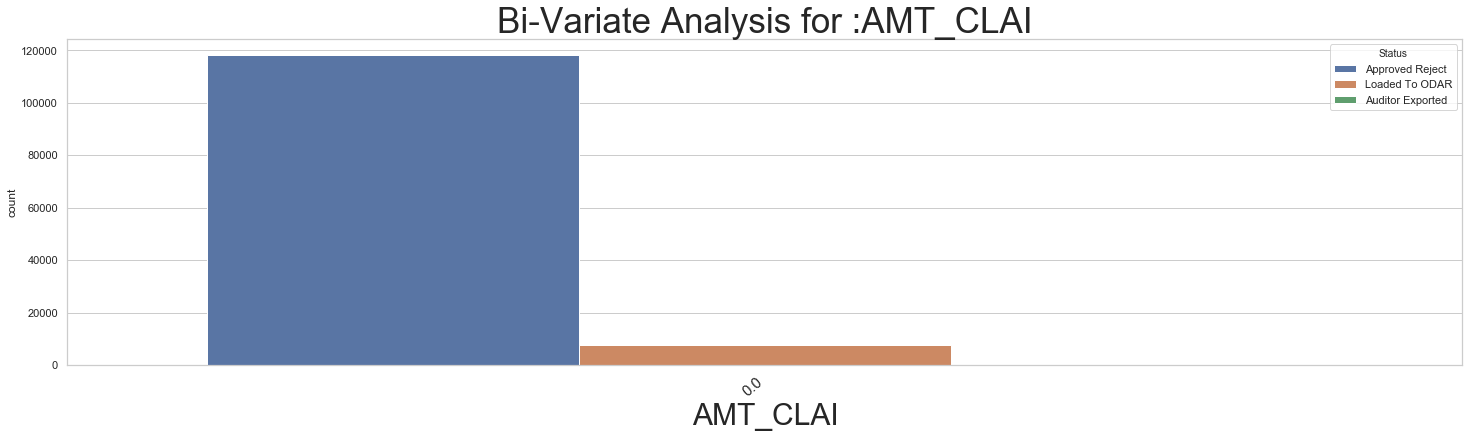

                                                                                   
                                                                                   
====== GENERATING STATS FOR CONTR_MKT_NBR: ================
====== Total Subcategories FOR  CONTR_MKT_NBR Are : 183
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For CONTR_MKT_NBR: ================
---------------------------------------
    CONTR_MKT_NBR  count  PERCENTAGE
0         0000000  30988    6.050737
182       8888888  21948    4.285580
103       0031529  20468    3.996595
23        0009451  20415    3.986246
39        0012471  19024    3.714638
153       0042586  17700    3.456113
144       0042577  17321    3.382109
89        0024508  15809    3.086875
5         0002407  14497    2.830693
18        0005440  14174    2.767624
100       0029523  13758    2.686396
169       0048606  13540    2.643829
104       0031530  11593    2.263657
32        0010460   9021    1.7

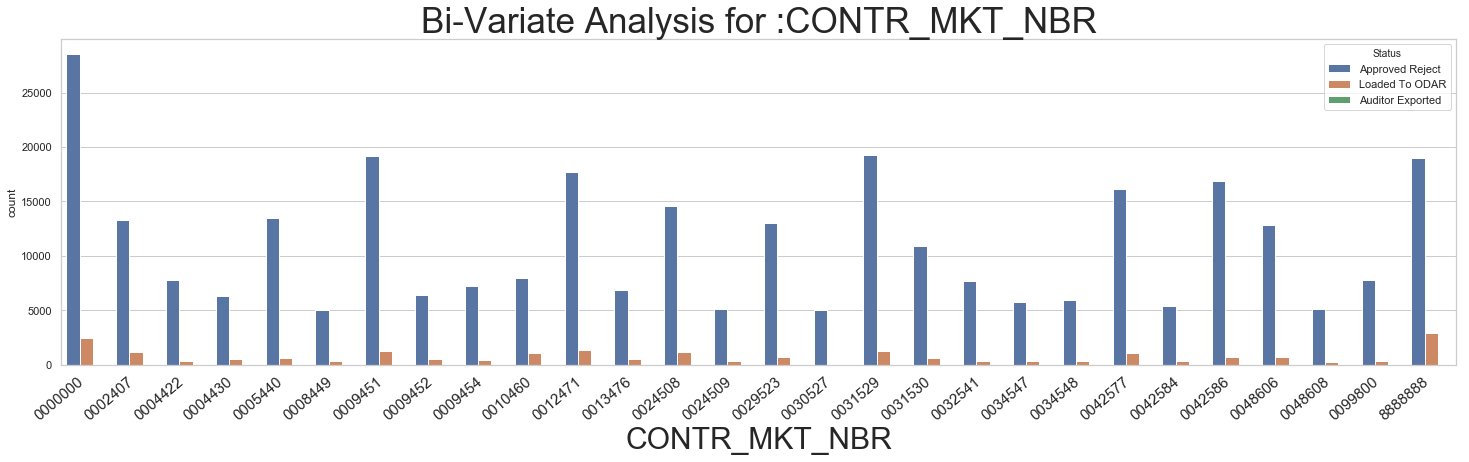

                                                                                   
                                                                                   
====== GENERATING STATS FOR DIAG3: ================
====== Total Subcategories FOR  DIAG3 Are : 7162
---------------------------------------
====== Subcategories FOR More Than  0.5 Percent Data For DIAG3: ================
---------------------------------------
       DIAG3  count  PERCENTAGE
1770     I10  14408    2.813315
643     D509   5420    1.058313
6914  Z79899   4846    0.946233
684     D631   4808    0.938813
837     E119   4499    0.878478
925     E785   4355    0.850360
6784   Z5111   3949    0.771084
3757   N2581   3631    0.708991
1139    F419   3302    0.644751
2435    K219   3008    0.587344
crosstab
====== CROSSTAB STATS FOR DIAG3: ================
---------------------------------------
DIAG3            D509  D631  E119  E785  F419    I10  K219  N2581  Z5111  \
Status                                     

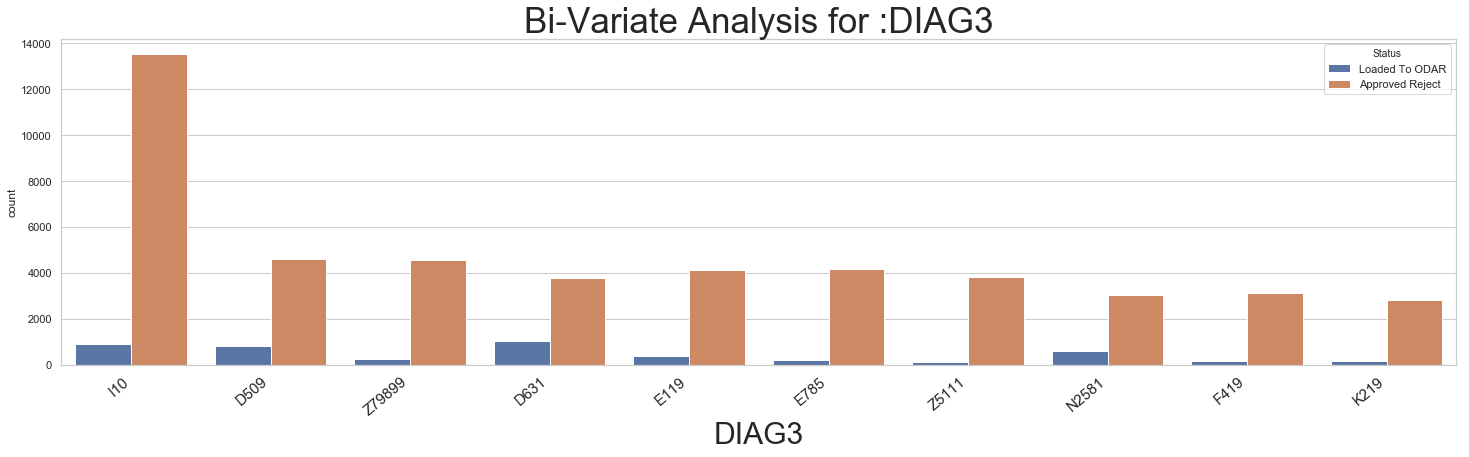

                                                                                   
                                                                                   
====== GENERATING STATS FOR CLM_LOC: ================
====== Total Subcategories FOR  CLM_LOC Are : 2
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For CLM_LOC: ================
---------------------------------------
  CLM_LOC   count  PERCENTAGE
0       1  480095   93.743654
1       2   32041    6.256346
crosstab
====== CROSSTAB STATS FOR CLM_LOC: ================
---------------------------------------
CLM_LOC                1      2     All
Status                                 
Approved Reject   451650  26726  478376
Auditor Exported      57      0      57
Loaded To ODAR     28388   5315   33703
All               480095  32041  512136
====== CHI2 STATS For CLM_LOC: ================
---------------------------------------
Below are Chi-2 test results
dof=2
probability=0.9

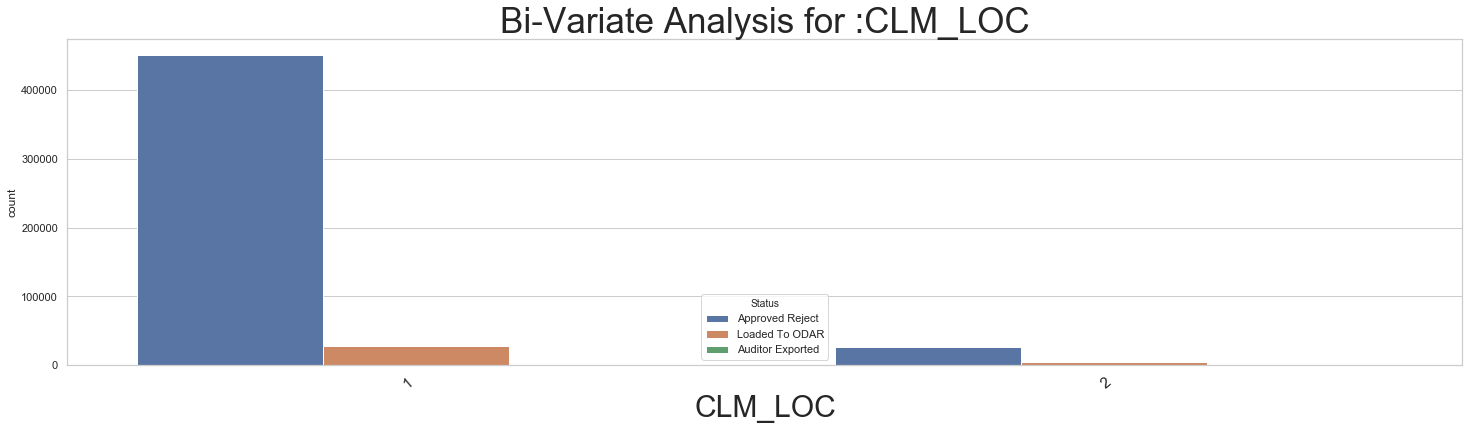

                                                                                   
                                                                                   
====== GENERATING STATS FOR RVNU_CD: ================
====== Total Subcategories FOR  RVNU_CD Are : 74
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For RVNU_CD: ================
---------------------------------------
   RVNU_CD   count  PERCENTAGE
46    0450  102360   19.986878
19    0240   97854   19.107034
51    0490   60499   11.813073
25    0300   57016   11.132980
0     0000   48307    9.432455
56    0550   25135    4.907876
35    0320   24578    4.799116
42    0420   20599    4.022174
50    0480   11570    2.259166
55    0540   11456    2.236906
65    0821    7347    1.434580
45    0440    6648    1.298093
18    0200    5151    1.005788
crosstab
====== CROSSTAB STATS FOR RVNU_CD: ================
---------------------------------------
RVNU_CD            0000  0200   0

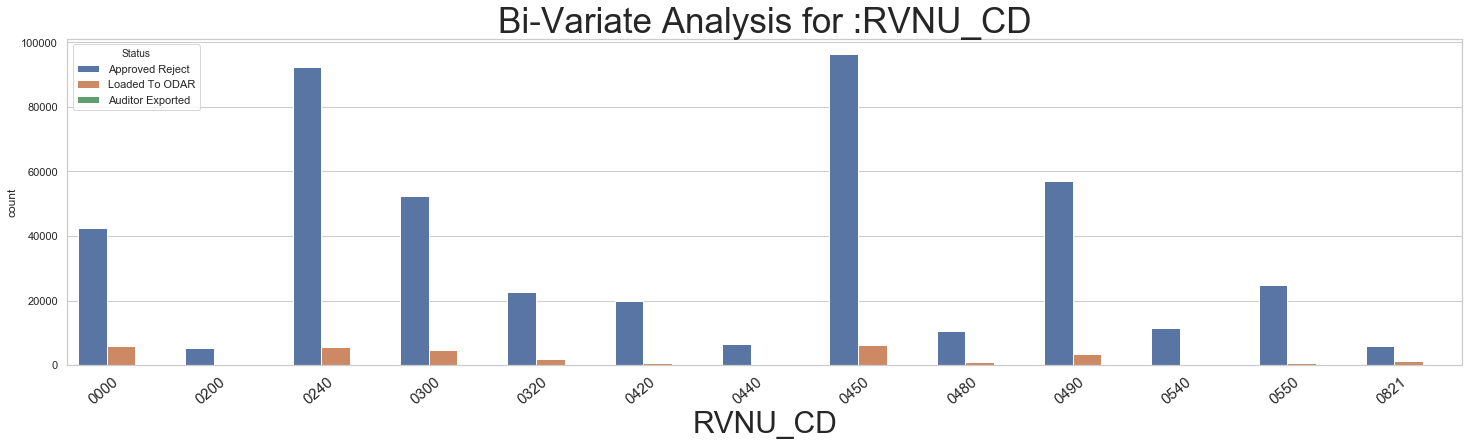

                                                                                   
                                                                                   
====== GENERATING STATS FOR MBRMKT: ================
====== Total Subcategories FOR  MBRMKT Are : 184
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For MBRMKT: ================
---------------------------------------
      MBRMKT  count  PERCENTAGE
22   0009451  23943    4.675125
38   0012471  21828    4.262149
149  0042577  20576    4.017683
105  0031529  19111    3.731626
101  0029523  18640    3.639658
90   0024508  17182    3.354968
158  0042586  16718    3.264367
4    0002407  16660    3.253042
17   0005440  15133    2.954879
175  0048606  14089    2.751027
106  0031530  12516    2.443882
31   0010460  11417    2.229291
23   0009452   9939    1.940695
25   0009454   8354    1.631207
10   0004422   8049    1.571653
12   0004430   7855    1.533772
42   0013476   7515    1.4

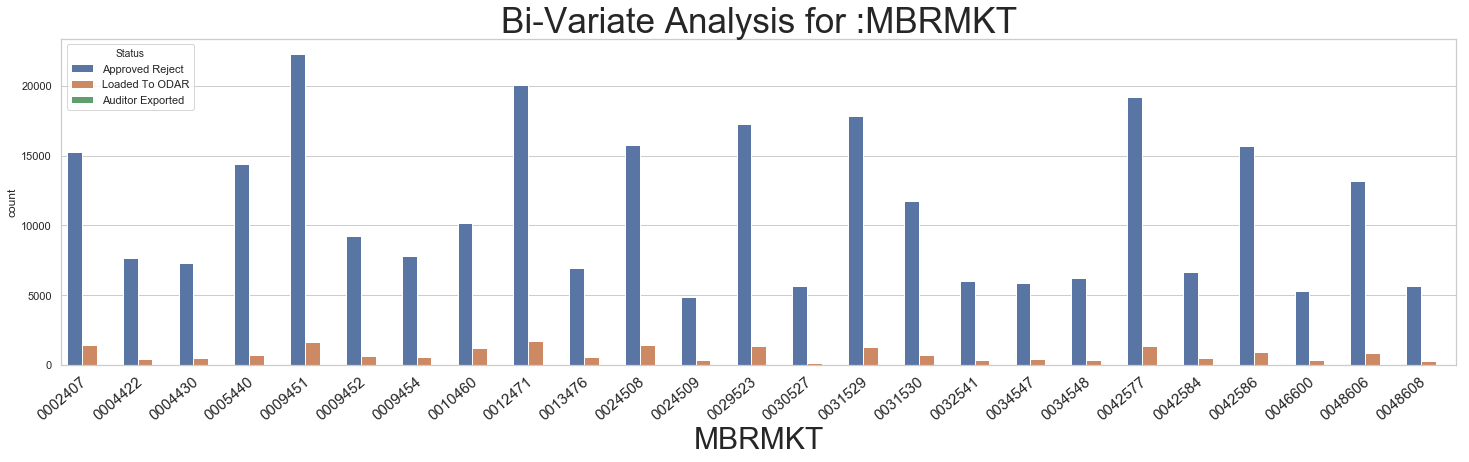

                                                                                   
                                                                                   
====== GENERATING STATS FOR SRVRSNCD: ================
====== Total Subcategories FOR  SRVRSNCD Are : 374
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For SRVRSNCD: ================
---------------------------------------
    SRVRSNCD   count  PERCENTAGE
134       D2  293099   57.230697
329       UL   41233    8.051182
133       D1   36704    7.166846
367       YP   26316    5.138479
88        7Y    8247    1.610314
311       S6    8075    1.576730
76        71    7805    1.524009
2         05    5909    1.153795
0         00    5753    1.123334
115       B9    5164    1.008326
crosstab
====== CROSSTAB STATS FOR SRVRSNCD: ================
---------------------------------------
SRVRSNCD            00    05    71    7Y    B9     D1      D2    S6     UL  \
Status               

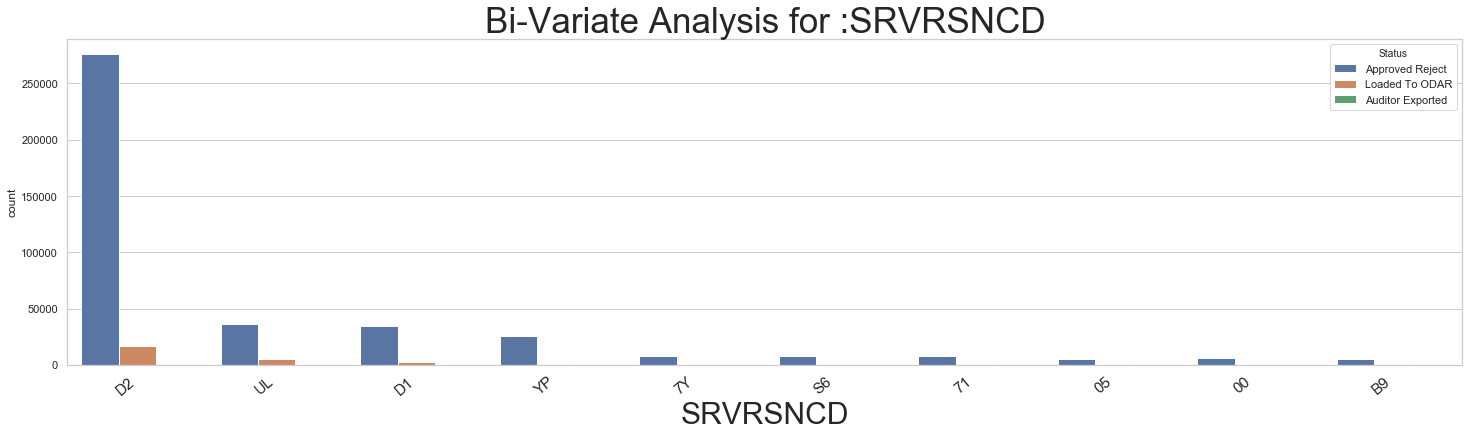

                                                                                   
                                                                                   
====== GENERATING STATS FOR DIAG_4_CD: ================
====== Total Subcategories FOR  DIAG_4_CD Are : 6192
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For DIAG_4_CD: ================
---------------------------------------
     DIAG_4_CD  count  PERCENTAGE
1548       I10  12056    2.354062
582       D631   5933    1.158481
5936    Z79899   5362    1.046988
crosstab
====== CROSSTAB STATS FOR DIAG_4_CD: ================
---------------------------------------
DIAG_4_CD        D631    I10  Z79899    All
Status                                     
Approved Reject  4993  11356    5070  21419
Loaded To ODAR    940    700     292   1932
All              5933  12056    5362  23351
====== CHI2 STATS For DIAG_4_CD: ================
---------------------------------------
Below are C

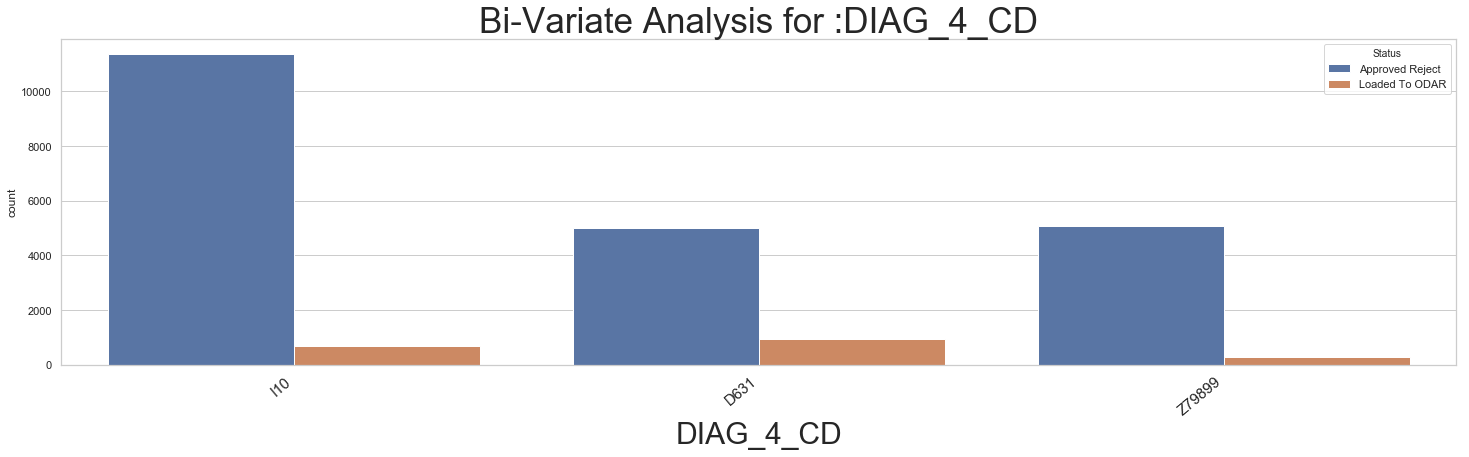

                                                                                   
                                                                                   
====== GENERATING STATS FOR AMT_PAID: ================
====== Total Subcategories FOR  AMT_PAID Are : 98103
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For AMT_PAID: ================
---------------------------------------
      AMT_PAID   count  PERCENTAGE
5161       0.0  235595   46.002429
crosstab
====== CROSSTAB STATS FOR AMT_PAID: ================
---------------------------------------
AMT_PAID             0.0     All
Status                          
Approved Reject   221205  221205
Auditor Exported       2       2
Loaded To ODAR     14388   14388
All               235595  235595
====== CHI2 STATS For AMT_PAID: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fail t

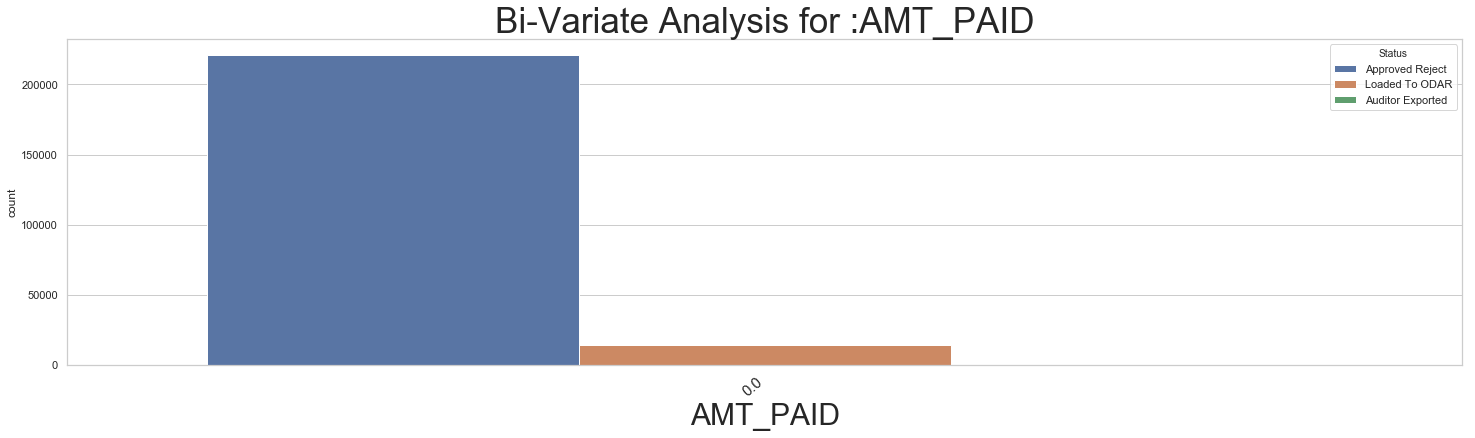

                                                                                   
                                                                                   
====== GENERATING STATS FOR SUBGRP_1_CD: ================
====== Total Subcategories FOR  SUBGRP_1_CD Are : 473
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For SUBGRP_1_CD: ================
---------------------------------------
    SUBGRP_1_CD  count  PERCENTAGE
1            AA  50589    9.878040
0             A  48940    9.556055
44           BW  36272    7.082494
195          IM  32067    6.261423
286          NM  31846    6.218270
2            AB  25725    5.023080
3            AC  21858    4.268007
4            AD  14333    2.798671
6            AF  11331    2.212498
5            AE  10928    2.133808
24           BA   9573    1.869230
7            AG   8479    1.655615
9            AI   6381    1.245958
23            B   5876    1.147351
48            C   5346    1.04

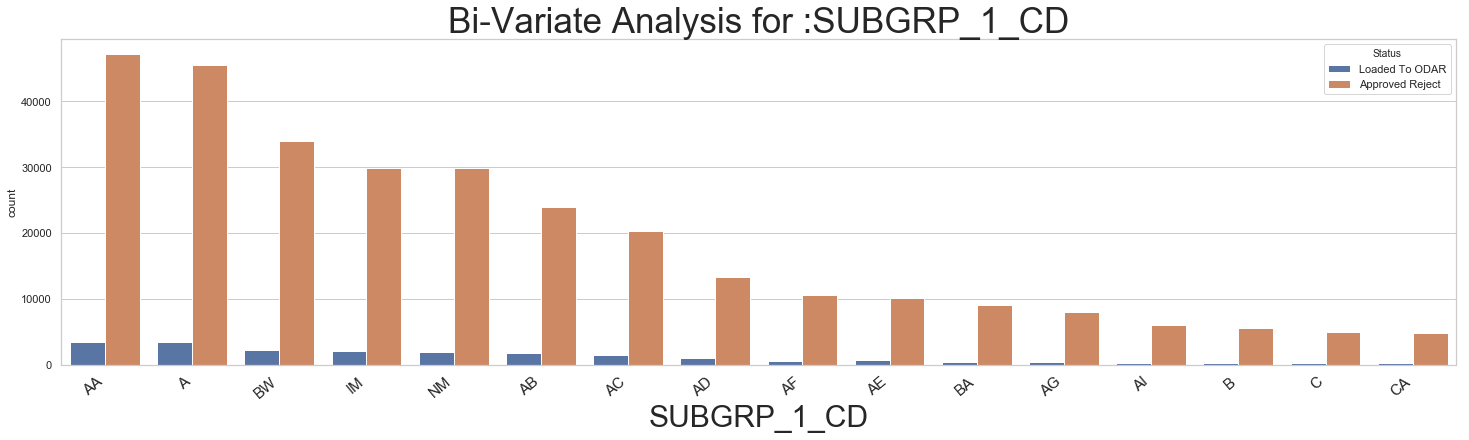

                                                                                   
                                                                                   
====== GENERATING STATS FOR FACL_CONTR_METH_CD: ================
====== Total Subcategories FOR  FACL_CONTR_METH_CD Are : 5
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For FACL_CONTR_METH_CD: ================
---------------------------------------
  FACL_CONTR_METH_CD   count  PERCENTAGE
0                  B  402871   78.664847
3                  R   30954    6.044098
crosstab
====== CROSSTAB STATS FOR FACL_CONTR_METH_CD: ================
---------------------------------------
FACL_CONTR_METH_CD       B      R     All
Status                                   
Approved Reject     377622  30538  408160
Auditor Exported        57      0      57
Loaded To ODAR       25192    416   25608
All                 402871  30954  433825
====== CHI2 STATS For FACL_CONTR_METH_CD: =======

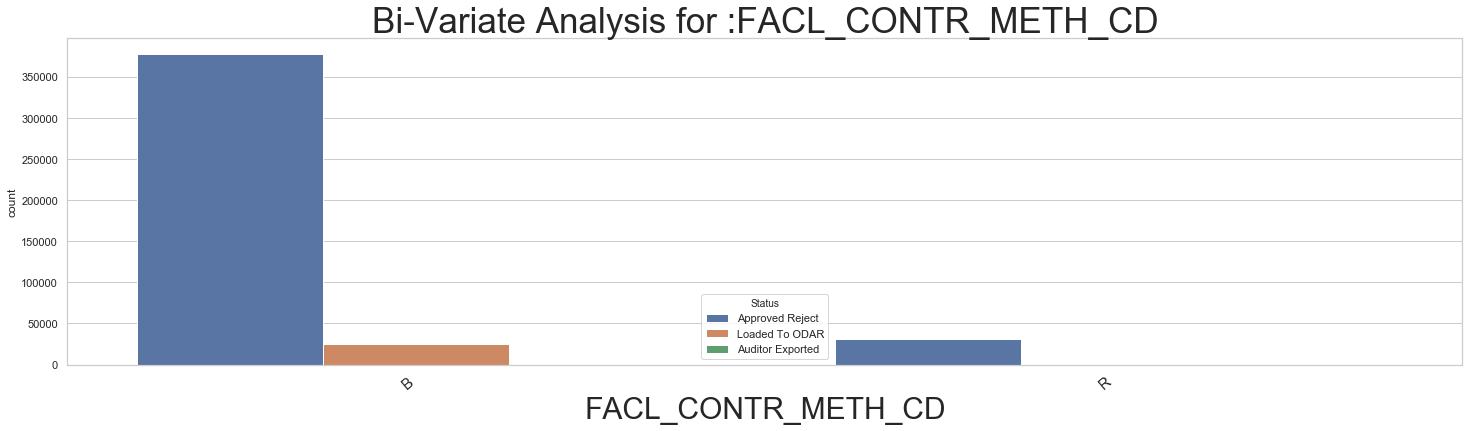

                                                                                   
                                                                                   
====== GENERATING STATS FOR PRBILST: ================
====== Total Subcategories FOR  PRBILST Are : 53
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PRBILST: ================
---------------------------------------
   PRBILST  count  PERCENTAGE
10      GA  69924   13.653405
44      TX  64209   12.537490
14      IL  47796    9.332677
4       CA  36503    7.127599
38      PA  30924    6.038240
34      NY  27773    5.422974
35      OH  22840    4.459753
19      MA  21697    4.236570
27      NC  20750    4.051658
24      MO  17543    3.425457
50      WI  17327    3.383281
9       FL  16874    3.294828
45      UT  13540    2.643829
5       CO  12981    2.534678
31      NJ   9670    1.888170
20      MD   9078    1.772576
3       AZ   7337    1.432627
22      MI   6842    1.33597

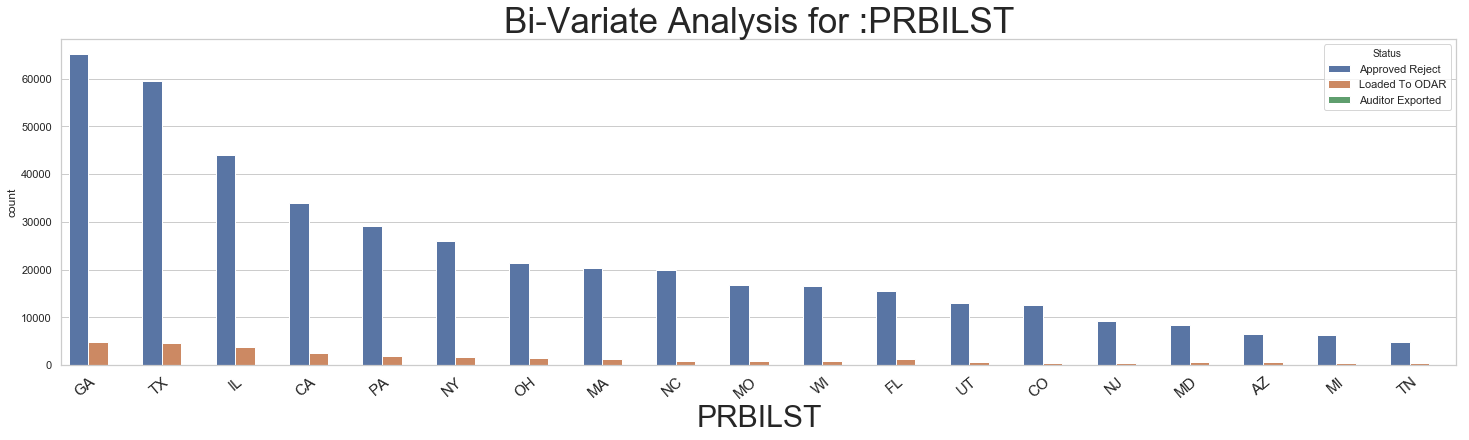

                                                                                   
                                                                                   
====== GENERATING STATS FOR AMT_DISC: ================
====== Total Subcategories FOR  AMT_DISC Are : 108909
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For AMT_DISC: ================
---------------------------------------
       AMT_DISC   count  PERCENTAGE
16247       0.0  235956   46.072918
crosstab
====== CROSSTAB STATS FOR AMT_DISC: ================
---------------------------------------
AMT_DISC             0.0     All
Status                          
Approved Reject   220276  220276
Auditor Exported      57      57
Loaded To ODAR     15623   15623
All               235956  235956
====== CHI2 STATS For AMT_DISC: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fai

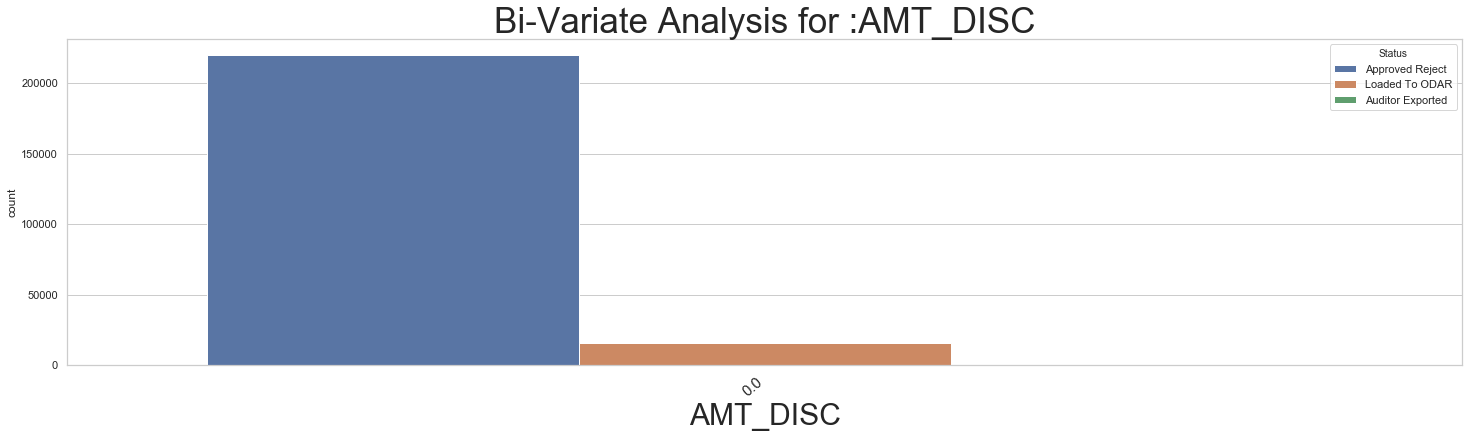

                                                                                   
                                                                                   
====== GENERATING STATS FOR SITUS_ST_ABBR_CD: ================
====== Total Subcategories FOR  SITUS_ST_ABBR_CD Are : 49
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For SITUS_ST_ABBR_CD: ================
---------------------------------------
   SITUS_ST_ABBR_CD  count  PERCENTAGE
41               TX  59799   11.676391
33               NY  54003   10.544660
14               IL  37333    7.289665
9                FL  31853    6.219637
4                CA  31009    6.054837
24               MO  20309    3.965548
46               WI  19792    3.864598
34               OH  19411    3.790204
10               GA  18559    3.623842
3                AZ  17793    3.474272
43               VA  14353    2.802576
30               NJ  12772    2.493869
23               MN  12538    2.44

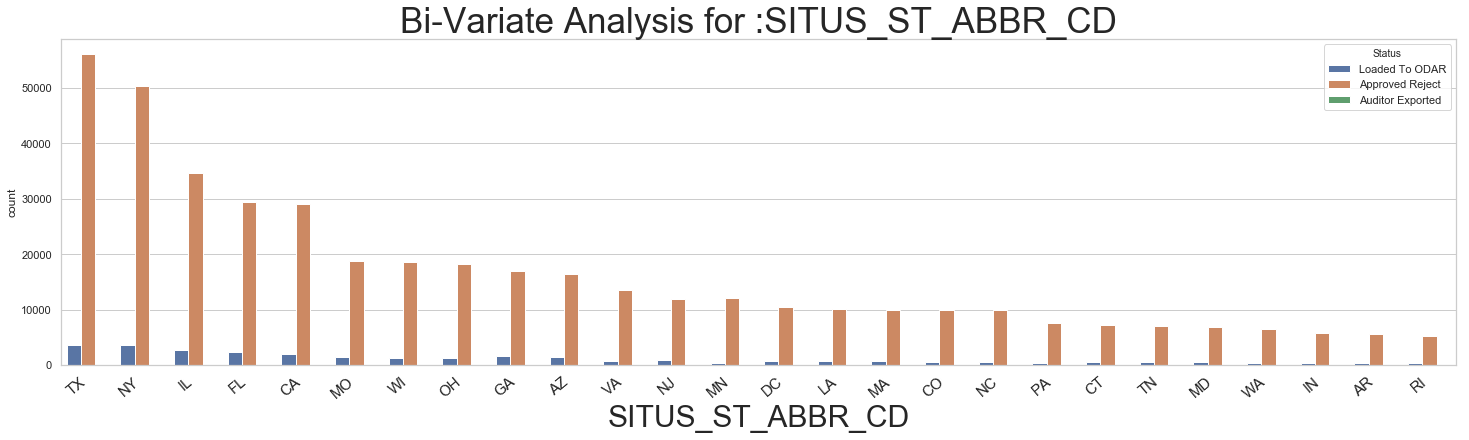

                                                                                   
                                                                                   
====== GENERATING STATS FOR PAIDDATE: ================
====== Total Subcategories FOR  PAIDDATE Are : 918
---------------------------------------
====== Subcategories FOR More Than  1 Percent Data For PAIDDATE: ================
---------------------------------------
Empty DataFrame
Columns: [PAIDDATE, count, PERCENTAGE]
Index: []
crosstab
====== CROSSTAB STATS FOR PAIDDATE: ================
---------------------------------------
No crosstab as df_gt_1_percent is empty
====== CHI2 STATS For PAIDDATE: ================
---------------------------------------
No crosstab as df_gt_1_percent is empty
                                                                                   
                                                                                   
====== GENERATING STATS FOR FSTSRVDT: ================


ValueError: Grouper for 'FSTSRVDT' not 1-dimensional

In [36]:
cols = ['coreextractid','CLAIMPOS','DIAG1','BIL_PROC_CD_CS','ADJ_NBR','PROV_CAT','PROC_CD','DIAG2','PROVNAME','PROVTIN'
                    ,'INDV_ID','OVRIDECD','AMT_CLAI'
                    ,'CONTR_MKT_NBR','DIAG3','CLM_LOC','RVNU_CD','MBRMKT'
                    ,'SRVRSNCD','DIAG_4_CD','AMT_PAID','SUBGRP_1_CD'
                    ,'FACL_CONTR_METH_CD','PRBILST','AMT_DISC'
                    ,'SITUS_ST_ABBR_CD'
              ,'PAIDDATE','FSTSRVDT','FROM_YMD','FSTSRVDT','LSTSRVDT','RECV_YMD'
                ,'AMT_NON_DUP','AMT_MAX','COPAY','CopayAmount'
              ]

for col in cols:
    #min = a if a < b else b 
    per = 0.5 if col == 'DIAG1' or col == 'DIAG2' or col == 'DIAG3' or col == 'PROC1' or col == 'PROC2' or col == 'PROC3' else 0

    hueCol = 'Status'
    numerical_col = 'AMT_PAID'
    display_x = col
    display_y = '($M) Amount Paid'
#     BiVariateAnalysisForGreaterThanOnePercentVolume(df_categorical, col, hueCol, percentage)
    reuse.MultiVariateAnalysisForGivenPercentVolume(df_model,col, hueCol, numerical_col, display_x, display_y, percentage = per)

Data columns (total 37 columns):
 ###   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   coreextractid       512136 non-null  object        Categorical columns
 1   CLAIMPOS            512136 non-null  object            |
 2   DIAG1               512134 non-null  object            |
 3   BIL_PROC_CD_CS      409874 non-null  object            |
 4   ADJ_NBR             512136 non-null  object            |
 5   PROV_CAT            512136 non-null  object            |
 6   PROC_CD             257204 non-null  object            |
 7   DIAG2               473292 non-null  object            |
 8   PROVNAME            512091 non-null  object            |
 9   PROVTIN             512136 non-null  object            |
 10  INDV_ID             511914 non-null  object            |
 11  OVRIDECD            219589 non-null  object            |
 13  CONTR_MKT_NBR       512136 non-null  object            |
 14  DIAG3               388712 non-null  object            |
 15  CLM_LOC             512136 non-null  object            |
 16  RVNU_CD             512136 non-null  object            |
 17  MBRMKT              512136 non-null  object            |
 18  SRVRSNCD            494807 non-null  object            |
 19  DIAG_4_CD           327382 non-null  object            |
 21  SUBGRP_1_CD         512126 non-null  object            |
 22  FACL_CONTR_METH_CD  436912 non-null  object            |
 23  PRBILST             512020 non-null  object            |
 25  SITUS_ST_ABBR_CD    495038 non-null  object        - Till here
 26  PAIDDATE            512136 non-null  datetime64[ns] - Few Date columms
 27  FSTSRVDT            512136 non-null  datetime64[ns]    |
 28  FROM_YMD            512136 non-null  datetime64[ns]    |
 29  FSTSRVDT            512136 non-null  datetime64[ns]    |
 30  LSTSRVDT            512136 non-null  datetime64[ns]    |
 31  RECV_YMD            512136 non-null  datetime64[ns]    Till here...
 24  AMT_DISC            512136 non-null  float64       - Numerical columns  (with few correlated ones)
 12  AMT_CLAI            512136 non-null  float64           |
 20  AMT_PAID            512136 non-null  float64           |
 32  AMT_NON_DUP         512136 non-null  float64           |
 33  AMT_MAX             512136 non-null  float64           |
 34  COPAY               512136 non-null  float64           |
 35  CopayAmount         512136 non-null  float64       - Till here
 36  Status              512136 non-null  object        - Target Columns

In [37]:
df_model.shape

(512136, 37)

In [18]:
df_model.to_pickle("EDA-Sample-data.pkl")